# Part-I: WeatherPy

In [1]:
# Dependencies and Setup
from numpy.random import uniform
import requests
import json
import csv
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display
from config import api_key
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

lats = list(uniform(-90, 90, 2000))
lons = list(uniform(-180, 180, 2000))

cities_list = []
a = 0
pro_dir = ''

## Generate Cities List

In [2]:
print('starting...')

with open(pro_dir + '../selected_cities/selected_cities.csv', mode = 'w', newline = '') as city_file:
    city_writer = csv.writer(city_file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    city_writer.writerow(['City Name',
                          'Latitude',
                          'Longitude',
                          'Temperature (F)',
                          'Max. Temp (F)',
                          'Min. Temp (F)',
                          'Humidity (%)',
                          'Cloudiness (%)',
                          'Wind Speed (mph)',
                          'Country Code', 'Date & Time']
                        )
    for j in range(2000):
        lat = lats[j]
        lon = lons[j]
        
        city = citipy.nearest_city(lat, lon)
        city_name = city.city_name
        print('Fetching and processing record for: ', city_name)

        url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city_name, api_key)
        
        if not city_name in cities_list:
            response = requests.get(url)
            data = json.loads(response.text)
            try:
                to_save = [city_name,
                           data['coord']['lat'],
                           data['coord']['lon'],
                           data['main']['temp'],
                           data['main']['temp_max'],
                           data['main']['temp_min'],
                           data['main']['humidity'],
                           data['clouds']['all'],
                           data['wind']['speed'],
                           data['sys']['country'],
                           datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")
                          ]
                city_writer.writerow(to_save)
                cities_list.append(city_name)
                a+=1
            except:
                print(data['message'] + '!')

        if a == 500:
            break

print('Total Cites: ', len(cities_list))

starting...
Fetching and processing record for:  siavonga
Fetching and processing record for:  hermanus
Fetching and processing record for:  san policarpo
Fetching and processing record for:  ulaangom
Fetching and processing record for:  mugur-aksy
Fetching and processing record for:  ravar
Fetching and processing record for:  zeya
Fetching and processing record for:  rikitea
Fetching and processing record for:  vardo
Fetching and processing record for:  punta arenas
Fetching and processing record for:  belle fourche
Fetching and processing record for:  bredasdorp
Fetching and processing record for:  okhotsk
Fetching and processing record for:  san patricio
Fetching and processing record for:  new norfolk
Fetching and processing record for:  kotovo
Fetching and processing record for:  kastamonu
Fetching and processing record for:  antalaha
Fetching and processing record for:  dawlatabad
Fetching and processing record for:  cabo san lucas
Fetching and processing record for:  barrow
Fetc

Fetching and processing record for:  ushuaia
Fetching and processing record for:  victoria
Fetching and processing record for:  hermanus
Fetching and processing record for:  biak
Fetching and processing record for:  padang
Fetching and processing record for:  cape town
Fetching and processing record for:  chuy
Fetching and processing record for:  buraydah
Fetching and processing record for:  yanam
Fetching and processing record for:  clyde river
Fetching and processing record for:  kaitangata
Fetching and processing record for:  gillette
Fetching and processing record for:  port stanley
Fetching and processing record for:  kodiak
Fetching and processing record for:  kapaa
Fetching and processing record for:  kaitangata
Fetching and processing record for:  bonfim
Fetching and processing record for:  salinas
Fetching and processing record for:  kushmurun
Fetching and processing record for:  asau
Fetching and processing record for:  bengkulu
Fetching and processing record for:  athboy
Fet

Fetching and processing record for:  tuktoyaktuk
Fetching and processing record for:  barrow
Fetching and processing record for:  camacha
Fetching and processing record for:  vaini
Fetching and processing record for:  albany
Fetching and processing record for:  samalaeulu
city not found!
Fetching and processing record for:  hermanus
Fetching and processing record for:  carmen
Fetching and processing record for:  touros
Fetching and processing record for:  marawi
Fetching and processing record for:  carutapera
Fetching and processing record for:  taolanaro
city not found!
Fetching and processing record for:  makakilo city
Fetching and processing record for:  palmer
Fetching and processing record for:  urechesti
Fetching and processing record for:  mataura
Fetching and processing record for:  hilo
Fetching and processing record for:  thompson
Fetching and processing record for:  belushya guba
city not found!
Fetching and processing record for:  lebu
Fetching and processing record for:  r

Fetching and processing record for:  ushuaia
Fetching and processing record for:  ponta delgada
Fetching and processing record for:  taos
Fetching and processing record for:  antigonish
Fetching and processing record for:  saint-philippe
Fetching and processing record for:  rikitea
Fetching and processing record for:  dikson
Fetching and processing record for:  concepcion del oro
Fetching and processing record for:  bridlington
Fetching and processing record for:  ruteng
Fetching and processing record for:  punta arenas
Fetching and processing record for:  jamestown
Fetching and processing record for:  rikitea
Fetching and processing record for:  kilindoni
Fetching and processing record for:  ushuaia
Fetching and processing record for:  hilo
Fetching and processing record for:  rikitea
Fetching and processing record for:  luau
Fetching and processing record for:  broome
Fetching and processing record for:  pakhtakoron
Fetching and processing record for:  daru
Fetching and processing re

Fetching and processing record for:  jamestown
Fetching and processing record for:  rikitea
Fetching and processing record for:  barrow
Fetching and processing record for:  kavaratti
Fetching and processing record for:  flinders
Fetching and processing record for:  albany
Fetching and processing record for:  karratha
Fetching and processing record for:  safaga
Fetching and processing record for:  kununurra
Fetching and processing record for:  ponta do sol
Fetching and processing record for:  ayan
Fetching and processing record for:  bluff
Fetching and processing record for:  khatanga
Fetching and processing record for:  carnarvon
Fetching and processing record for:  belushya guba
city not found!
Fetching and processing record for:  portland
Fetching and processing record for:  guilin
Fetching and processing record for:  coquimbo
Fetching and processing record for:  tekeli
Fetching and processing record for:  taolanaro
city not found!
Fetching and processing record for:  udachnyy
Fetchi

Fetching and processing record for:  naze
Fetching and processing record for:  sogdiondon
city not found!
Fetching and processing record for:  ponta do sol
Fetching and processing record for:  mataura
Fetching and processing record for:  hilo
Fetching and processing record for:  dicabisagan
Fetching and processing record for:  turinsk
Fetching and processing record for:  busselton
Fetching and processing record for:  olinda
Fetching and processing record for:  carolina
Fetching and processing record for:  ponta do sol
Fetching and processing record for:  kapaa
Fetching and processing record for:  punta arenas
Fetching and processing record for:  new norfolk
Fetching and processing record for:  saint-philippe
Fetching and processing record for:  juifang
city not found!
Fetching and processing record for:  hermanus
Fetching and processing record for:  vaini
Fetching and processing record for:  barentsburg
city not found!
Fetching and processing record for:  verkhnyaya inta
Fetching and p

city not found!
Fetching and processing record for:  yeppoon
Fetching and processing record for:  vaini
Fetching and processing record for:  punta arenas
Fetching and processing record for:  puerto ayora
Fetching and processing record for:  tiksi
Fetching and processing record for:  rikitea
Fetching and processing record for:  hermanus
Fetching and processing record for:  batagay
Fetching and processing record for:  saint george
Fetching and processing record for:  qaanaaq
Fetching and processing record for:  atuona
Fetching and processing record for:  vaini
Fetching and processing record for:  luancheng
Fetching and processing record for:  yarmouth
Fetching and processing record for:  hermanus
Fetching and processing record for:  illoqqortoormiut
city not found!
Fetching and processing record for:  rikitea
Fetching and processing record for:  kouroussa
Fetching and processing record for:  evensk
Fetching and processing record for:  tashara
Fetching and processing record for:  kapaa
Fe

Fetching and processing record for:  albany
Fetching and processing record for:  atuona
Fetching and processing record for:  illoqqortoormiut
city not found!
Fetching and processing record for:  hualmay
Fetching and processing record for:  itoman
Fetching and processing record for:  busselton
Fetching and processing record for:  kodiak
Fetching and processing record for:  clyde river
Fetching and processing record for:  atuona
Fetching and processing record for:  hermanus
Fetching and processing record for:  rikitea
Fetching and processing record for:  mehamn
Fetching and processing record for:  khatanga
Fetching and processing record for:  tasiilaq
Fetching and processing record for:  vaini
Fetching and processing record for:  kegayli
city not found!
Fetching and processing record for:  ushuaia
Fetching and processing record for:  marzuq
Fetching and processing record for:  homer
Fetching and processing record for:  belushya guba
city not found!
Fetching and processing record for:  hi

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

## Convert Raw Data to DataFrame
* Export the city data into a CSV file
* Display the DataFrame

In [3]:
cities_path = "../selected_cities/selected_cities.csv"

# Read the 'Cities' data that we just stored in a CSV file.
cities_data = pd.read_csv(pro_dir + cities_path)
display(cities_data)

,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,siavonga,-16.5382,28.7088,82.31,82.31,82.31,60,28,7.87,ZM,14-01-2021 01:03:54
1,hermanus,-34.4187,19.2345,75.99,75.99,75.99,74,72,13.00,ZA,14-01-2021 01:03:55
2,san policarpo,12.1791,125.5072,80.13,80.13,80.13,86,100,9.26,PH,14-01-2021 01:03:58
3,ulaangom,49.9811,92.0667,-4.92,-4.92,-4.92,91,100,1.28,MN,14-01-2021 01:03:59
4,mugur-aksy,50.3500,90.5000,3.69,3.69,3.69,88,100,5.28,RU,14-01-2021 01:04:03
...,...,...,...,...,...,...,...,...,...,...,...
495,vitim,59.4511,112.5578,-14.75,-14.75,-14.75,85,100,8.68,RU,14-01-2021 01:15:22
496,omboue,-1.5746,9.2618,73.99,73.99,73.99,91,100,9.40,GA,14-01-2021 01:15:23
497,gasa,31.5000,34.4667,73.33,73.99,73.00,34,100,1.99,PS,14-01-2021 01:15:24
498,samarai,-10.6167,150.6667,83.62,83.62,83.62,78,100,8.28,PG,14-01-2021 01:15:25


In [4]:
described_data = cities_data.describe()
display(described_data)

,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,20.748451,19.326612,48.116260,48.555720,47.705280,72.042000,51.21800,8.431500
std,34.049387,89.877666,34.497268,34.508513,34.527419,20.943579,39.62007,6.311212
min,-54.800000,-179.166700,-42.700000,-42.700000,-42.700000,2.000000,0.00000,0.180000
25%,-8.928275,-58.627400,27.617500,28.437500,26.600000,61.000000,3.00000,3.700000
50%,25.995700,24.981200,57.200000,57.220000,57.100000,79.000000,58.50000,6.910000
75%,50.328325,95.142475,77.022500,77.280000,77.000000,87.000000,90.00000,11.500000
max,77.484000,178.416700,99.970000,99.970000,99.970000,100.000000,100.00000,44.870000


## Inspect the data and remove the cities where the humidity > 100%
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# There is no city with humidity greated than 100% but still for understanding, 
# following is the method to take only ones that are greater or equal to 100% humidity.

cities_data_removed_g100_humidity = cities_data[cities_data['Humidity (%)'] <= 100]
print(cities_data_removed_g100_humidity.shape)
display(cities_data_removed_g100_humidity)

(500, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,siavonga,-16.5382,28.7088,82.31,82.31,82.31,60,28,7.87,ZM,14-01-2021 01:03:54
1,hermanus,-34.4187,19.2345,75.99,75.99,75.99,74,72,13.00,ZA,14-01-2021 01:03:55
2,san policarpo,12.1791,125.5072,80.13,80.13,80.13,86,100,9.26,PH,14-01-2021 01:03:58
3,ulaangom,49.9811,92.0667,-4.92,-4.92,-4.92,91,100,1.28,MN,14-01-2021 01:03:59
4,mugur-aksy,50.3500,90.5000,3.69,3.69,3.69,88,100,5.28,RU,14-01-2021 01:04:03
...,...,...,...,...,...,...,...,...,...,...,...
495,vitim,59.4511,112.5578,-14.75,-14.75,-14.75,85,100,8.68,RU,14-01-2021 01:15:22
496,omboue,-1.5746,9.2618,73.99,73.99,73.99,91,100,9.40,GA,14-01-2021 01:15:23
497,gasa,31.5000,34.4667,73.33,73.99,73.00,34,100,1.99,PS,14-01-2021 01:15:24
498,samarai,-10.6167,150.6667,83.62,83.62,83.62,78,100,8.28,PG,14-01-2021 01:15:25


In [6]:
# Get the indices of cities that have humidity over 100%.
# There is no such value in our data but the method is as follow:

indexs_hum_g100 = cities_data[cities_data['Humidity (%)'] > 100].index
print(indexs_hum_g100)

Int64Index([], dtype='int64')


In [7]:
# Making a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace = False" will make a copy of the 'city_data' DataFrame, which we call "clean_city_data".

q1 = cities_data['Humidity (%)'].quantile(0.25)
q3 = cities_data['Humidity (%)'].quantile(0.75)
iqr = q3-q1

# For our understanding, let's find out the outlier data as well.
cities_with_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] < (q1 - 1.5 * iqr)]
cities_with_humid_outliers_2 =cities_data[cities_data['Humidity (%)'] > (q3 + 1.5 * iqr)]
cities_with_humid_outliers = pd.concat([cities_with_humid_outliers_1, cities_with_humid_outliers_2])

# Take the data with no outliers in humidity - 'clean_cities_data'
cities_without_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] > (q1 - 1.5 * iqr)]
clean_cities_data = cities_without_humid_outliers_1[cities_without_humid_outliers_1['Humidity (%)']  < (q3 + 1.5 * iqr)]

print('Outliers Shape:', cities_with_humid_outliers.shape, '\nClean City Data Shape:', clean_cities_data.shape)
display(clean_cities_data)
display(cities_with_humid_outliers)

Outliers Shape: (19, 11) 
Clean City Data Shape: (480, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,siavonga,-16.5382,28.7088,82.31,82.31,82.31,60,28,7.87,ZM,14-01-2021 01:03:54
1,hermanus,-34.4187,19.2345,75.99,75.99,75.99,74,72,13.00,ZA,14-01-2021 01:03:55
2,san policarpo,12.1791,125.5072,80.13,80.13,80.13,86,100,9.26,PH,14-01-2021 01:03:58
3,ulaangom,49.9811,92.0667,-4.92,-4.92,-4.92,91,100,1.28,MN,14-01-2021 01:03:59
4,mugur-aksy,50.3500,90.5000,3.69,3.69,3.69,88,100,5.28,RU,14-01-2021 01:04:03
...,...,...,...,...,...,...,...,...,...,...,...
495,vitim,59.4511,112.5578,-14.75,-14.75,-14.75,85,100,8.68,RU,14-01-2021 01:15:22
496,omboue,-1.5746,9.2618,73.99,73.99,73.99,91,100,9.40,GA,14-01-2021 01:15:23
497,gasa,31.5000,34.4667,73.33,73.99,73.00,34,100,1.99,PS,14-01-2021 01:15:24
498,samarai,-10.6167,150.6667,83.62,83.62,83.62,78,100,8.28,PG,14-01-2021 01:15:25


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
93,betare oya,5.6000,14.0833,99.28,99.28,99.28,10,49,3.44,CM,14-01-2021 01:05:55
115,birjand,32.8663,59.2211,57.20,57.20,57.20,2,0,6.91,IR,14-01-2021 01:06:25
156,mandera,3.9366,41.8670,94.84,94.84,94.84,18,0,12.24,KE,14-01-2021 01:07:15
211,dutse,11.7594,9.3392,89.96,89.96,89.96,11,0,10.89,NG,14-01-2021 01:08:29
212,tessalit,20.1986,1.0114,90.07,90.07,90.07,11,0,2.71,ML,14-01-2021 01:08:30
236,araouane,18.9048,-3.5265,85.48,85.48,85.48,13,0,8.61,ML,14-01-2021 01:09:04
237,kibala,9.1104,18.3463,96.80,96.80,96.80,12,0,9.22,TD,14-01-2021 01:09:05
281,san,13.3034,-4.8956,97.07,97.07,97.07,8,0,16.04,ML,14-01-2021 01:10:04
316,adrar,20.5022,-10.0711,78.22,78.22,78.22,16,0,14.67,MR,14-01-2021 01:10:59
343,salalah,17.0151,54.0924,80.60,80.60,80.60,17,0,23.02,OM,14-01-2021 01:11:34


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature (F) vs. Latitude Scatter Plot

<Figure size 432x288 with 0 Axes>

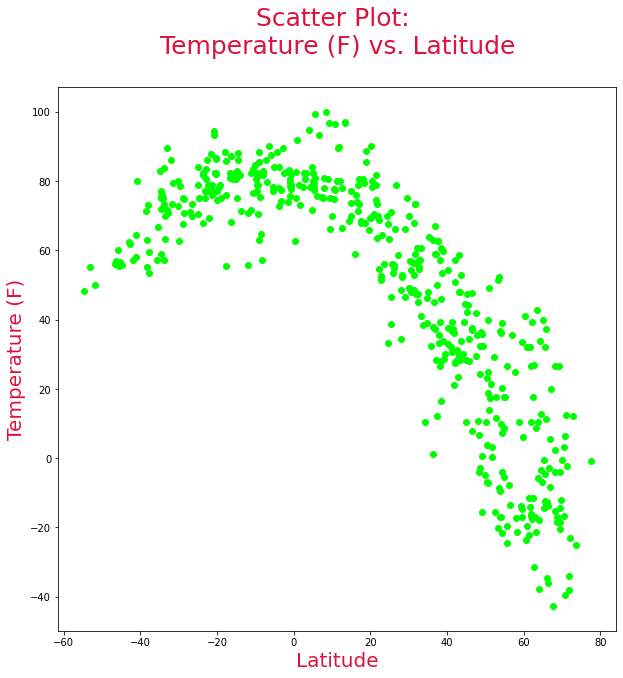

In [8]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/01_scatter_plot_temp_vs_lat.png')
plt.show()

## Humidity (%) vs. Latitude Scatter Plot

<Figure size 432x288 with 0 Axes>

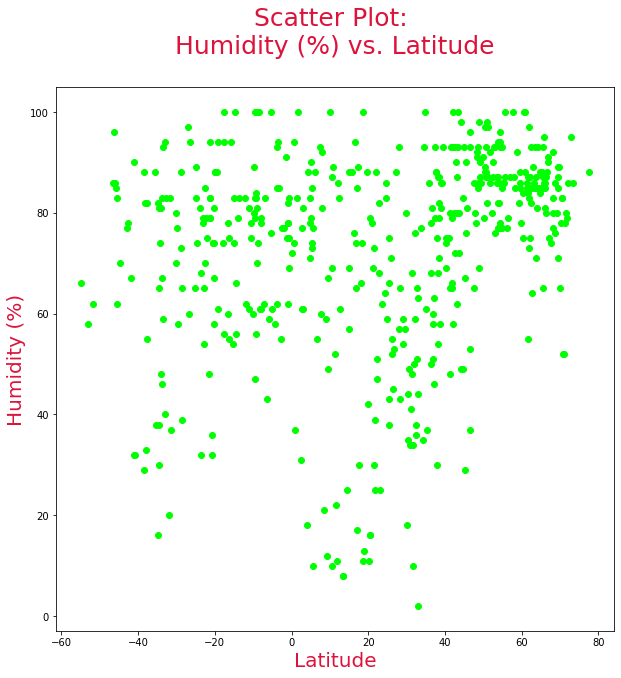

In [9]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/02_scatter_plot_humid_vs_lat.png')
plt.show()

## Cloudiness (%) vs. Latitude Scatter Plot

<Figure size 432x288 with 0 Axes>

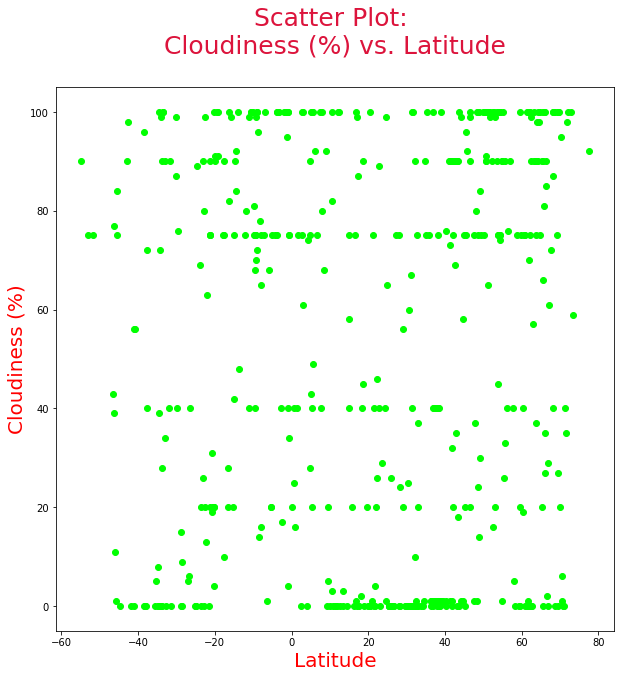

In [10]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/03_scatter_plot_cloud_vs_lat.png')
plt.show()

## Wind Speed (mph) vs. Latitude Scatter Plot

<Figure size 432x288 with 0 Axes>

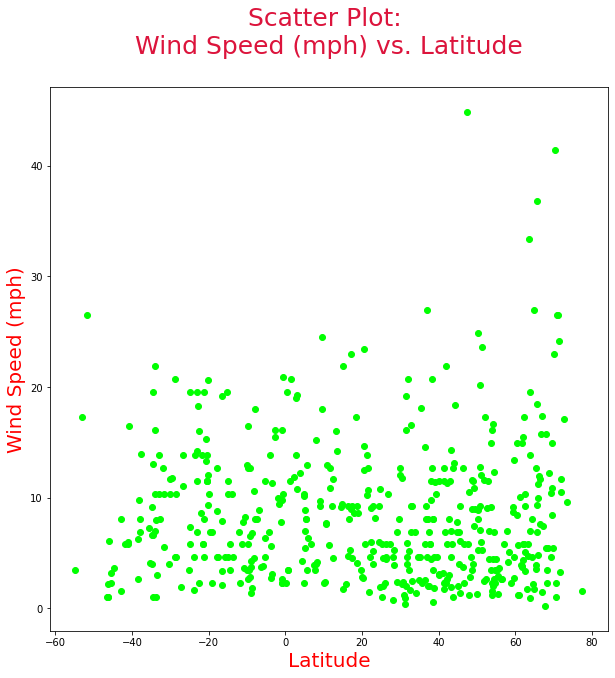

In [11]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/04_scatter_plot_windspeed_vs_lat.png')
plt.show()

## Linear Regression:
###  Northern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.7651112438345169


<Figure size 432x288 with 0 Axes>

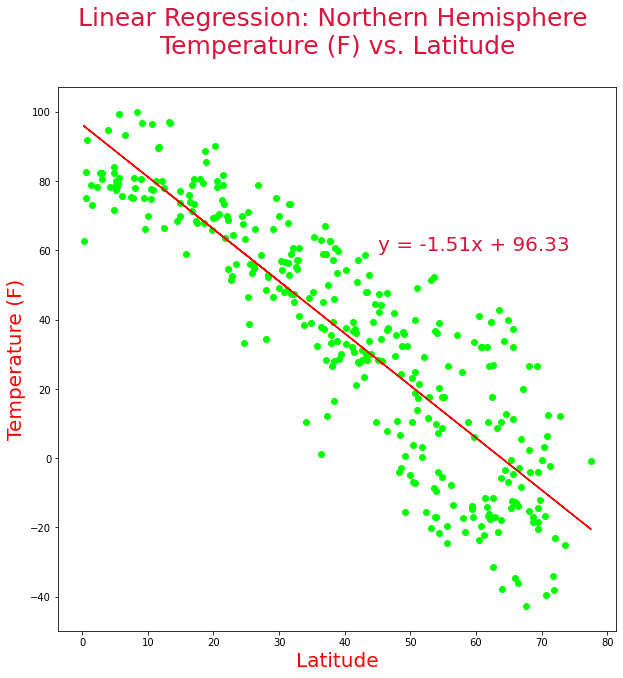

In [12]:
# Separating cities for Northen and Southern Hemisphere
cities_data_n_hem = cities_data[cities_data.Latitude >= 0]
cities_data_s_hem = cities_data[cities_data.Latitude < 0]

#print(cities_data_n_hem.shape,cities_data_s_hem.shape)
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/05_regression_northern_temp_vs_lat.png')
plt.show()

## Linear Regression:
###  Southern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.3734990220294126


<Figure size 432x288 with 0 Axes>

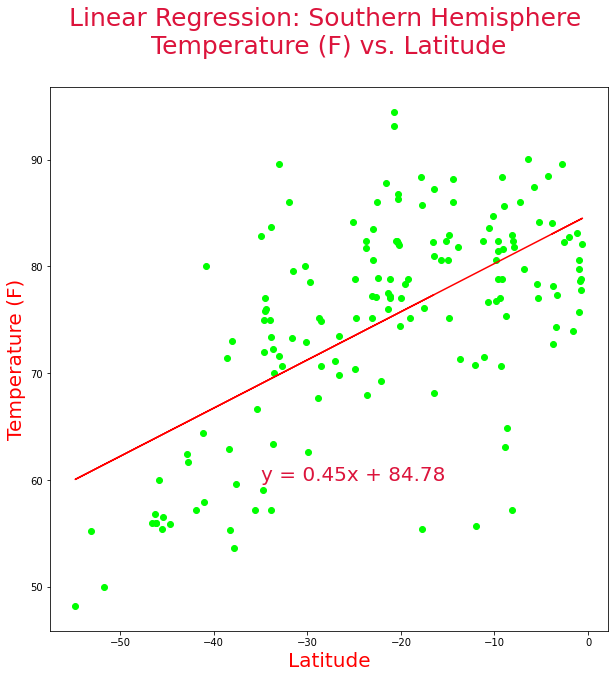

In [13]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/06_regression_southern_temp_vs_lat.png')
plt.show()

## LINEAR REGRESSION:
###  Northern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.18512534664480862


<Figure size 432x288 with 0 Axes>

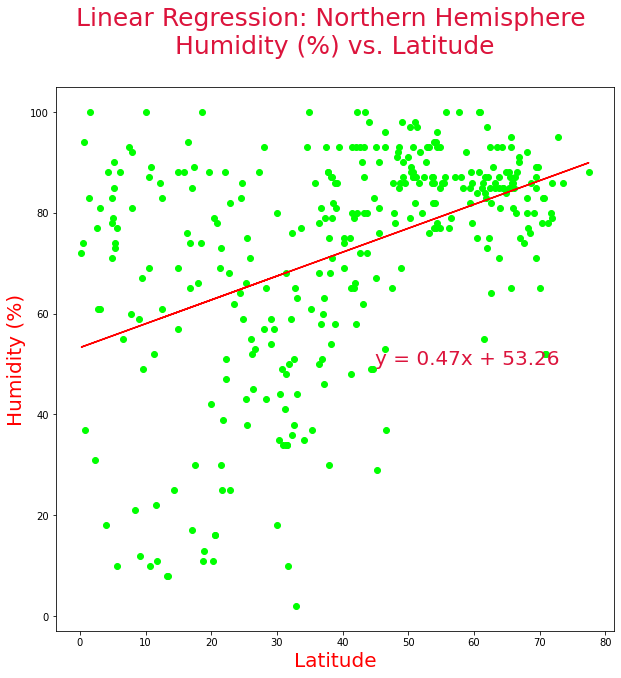

In [14]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 50), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/07_regression_northern_humid_vs_lat.png')
plt.show()

## Linear Regression:
###  Southern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.03376564815620728


<Figure size 432x288 with 0 Axes>

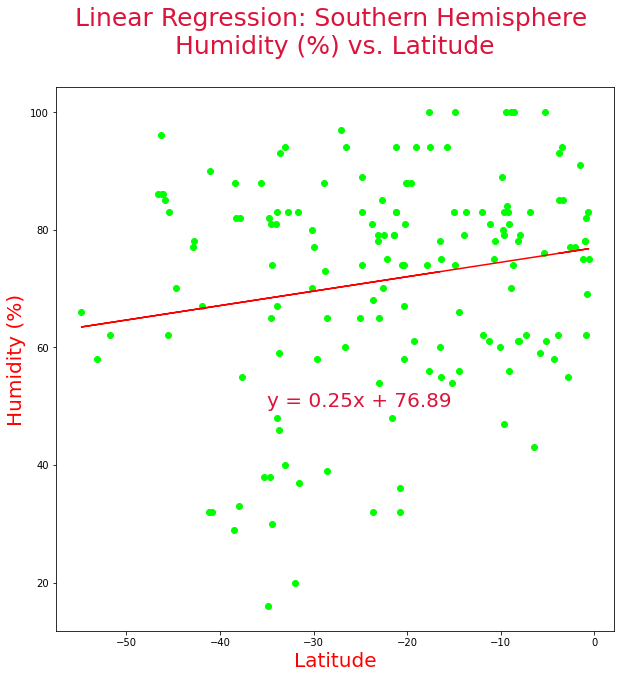

In [15]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 50), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/08_regression_southern_humid_vs_lat.png')
plt.show()

## Linear Regression:
###  Northern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.052930162685663786


<Figure size 432x288 with 0 Axes>

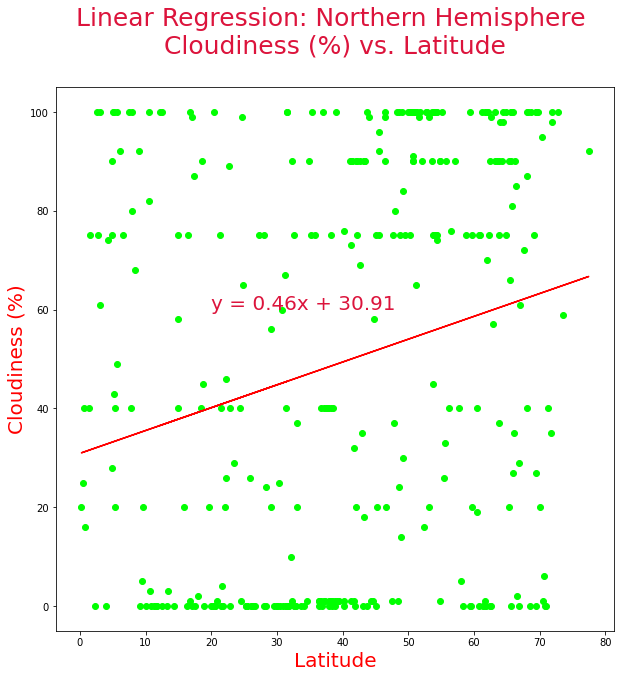

In [16]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (20, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/09_regression_northern_cloud_vs_lat.png')
plt.show()

## Linear Regression:
###  Southern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.076468249351246


<Figure size 432x288 with 0 Axes>

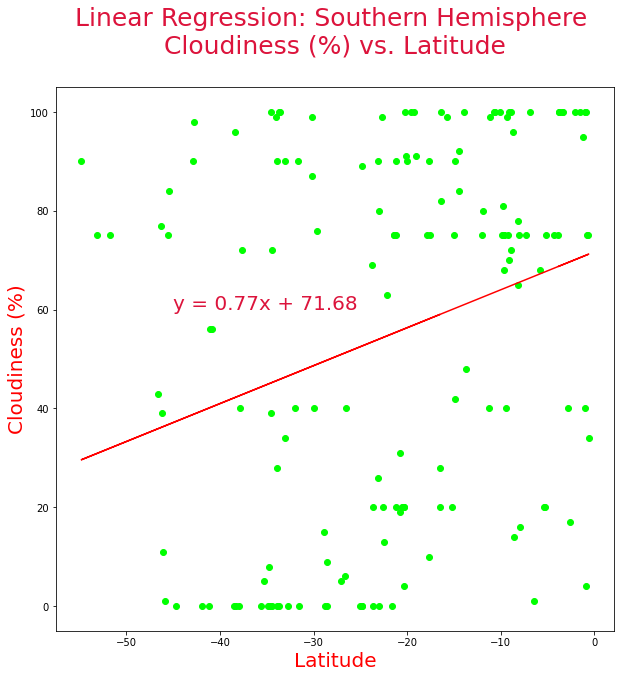

In [17]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-45, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/10_regression_southern_cloud_vs_lat.png')
plt.show()

## Linear Regression:
###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression: 0.0016085689087856714


<Figure size 432x288 with 0 Axes>

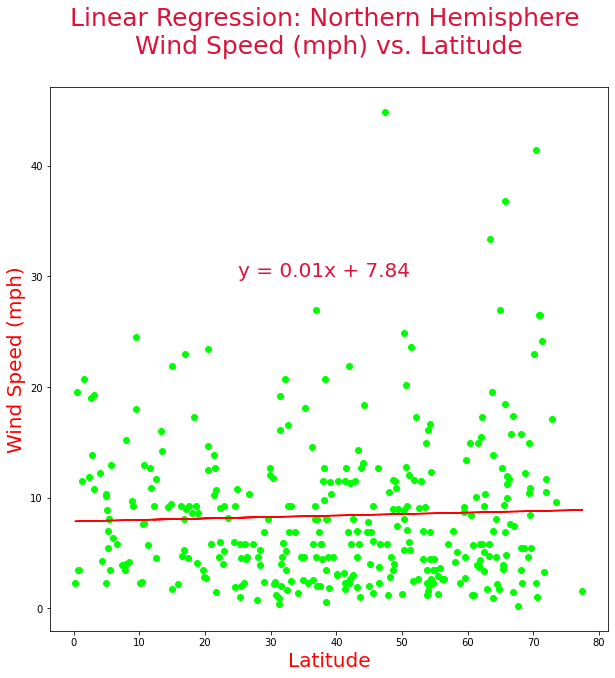

In [18]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (25, 30), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/11_regression_northern_windspeed_vs_lat.png')
plt.show()

## Linear Regression:
###  Southern Hemisphere - Wind Speed (mph) vs. Latitude

Regression: 9.685166661138062e-05


<Figure size 432x288 with 0 Axes>

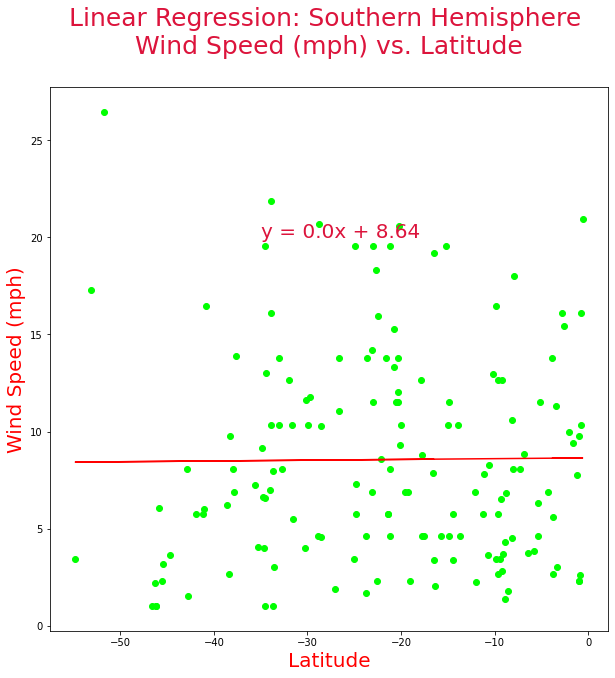

In [19]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 20), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/12_regression_southern_windspeed_vs_lat.png')
plt.show()